In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import Augmentor
import os
import skimage
from skimage import io

## 1. Image type 'tif' to 'png'  

In [2]:
path = "./data/CVC-ClinicDB/Original/" # path of tif file directory
outpath = "./data/CVC-ClinicDB/Original_png/" # directory of png file to save
in_names = os.listdir(path)
in_files = []
out_files = []

for f in in_names:
    pathsplit = os.path.splitext(f)
    in_files.append(os.path.join(path,f))
    out_files.append(os.path.join(outpath, "{0}{1}".format(pathsplit[0], ".png")))  # path to save

print(out_files[0])
for bundle in zip(in_files, out_files):
    img = io.imread(bundle[0])
    cv2.imwrite(bundle[1], img[::,::,::-1])

./data/CVC-ClinicDB/Original_png/1.png


In [5]:
img1 = io.imread('./preprocessing_test/1.tif')
img2 = io.imread('./preprocessing_test/1.png')

In [6]:
np.where(img1!=img2)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

## 2. MASK binarization  
You must do this process, in the dataset, there are some nosie

In [7]:
path = "./data/CVC-ClinicDB/Ground Truth/" # path of tif file directory
outpath = "./data/CVC-ClinicDB/Ground Truth_png/" # directory of png file to save
in_names = os.listdir(path)
in_files = []
out_files = []

for f in in_names:
    pathsplit = os.path.splitext(f)
    in_files.append(os.path.join(path,f))
    out_files.append(path + "_png/{0}{1}".format(pathsplit[0][1:], ".png"))

for bundle in zip(in_files, out_files):
    img = io.imread(bundle[0])
    #ret, binarized_img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
    binarized_img = (img//255) # eliminate noise values
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    closing = cv2.morphologyEx(binarized_img, cv2.MORPH_CLOSE, kernel)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
    cv2.imwrite(bundle[1], binarized_img*255)

[  0   8   9  10  11  12  13  14  15  16  17  18  19  21  22  23  24  25
  26  28  29  30  31  32  38  44  49  50  51  53  56  64  66  73  77  80
  82  85  88  91  96  98 112 255]


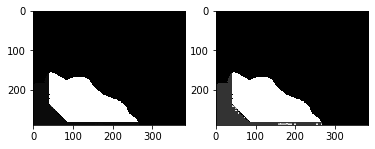

In [8]:
# the image in dataset has noise. the image must comprises two pixel, 0 and 255
img1 = io.imread('./preprocessing_test/1_mask.tif')
print(np.unique(img1))
plt.subplot(121)
plt.imshow(img1, cmap='gray')
plt.subplot(122)
plt.imshow(img1**3, cmap="gray")

In [9]:
img2 = io.imread('./preprocessing_test/1_mask.png')

In [10]:
np.unique(img1)

array([  0,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
        21,  22,  23,  24,  25,  26,  28,  29,  30,  31,  32,  38,  44,
        49,  50,  51,  53,  56,  64,  66,  73,  77,  80,  82,  85,  88,
        91,  96,  98, 112, 255], dtype=uint8)

In [11]:
np.unique(img2)

Array([  0, 255], dtype=uint8)

binarization is complete !!

## Data Augmentation

In [12]:
img1 = io.imread('./preprocessing_test/ct/1.png')
img2 = cv2.imread('./preprocessing_test/1_mask.png') # it must be same channel altoguth it is gray scale mask.
print(img1.shape)
print(img2.shape)

(288, 384, 3)
(288, 384, 3)


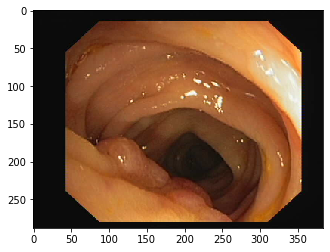

In [13]:
plt.imshow(img1)

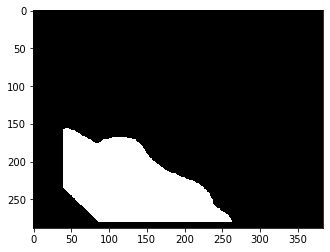

In [14]:
plt.imshow(img2, cmap="gray")

In [15]:
import Augmentor

In [16]:
p = Augmentor.DataPipeline([[img1,img2]])

In [17]:
p.resize(probability=1.0, width=256, height=256)
p.rotate_without_crop(probability=0.5, max_left_rotation=25, max_right_rotation=25)
p.shear(probability=0.5, max_shear_left=2, max_shear_right=2)
p.flip_random(probability=1.0)

In [18]:
a = p.sample(1)
print(type(a))
print(len(a))

<class 'list'>
1


In [19]:
print(np.array(a).shape)
sample = np.array(a).squeeze()
print(sample.shape)

(1, 2, 256, 256, 3)
(2, 256, 256, 3)


In [20]:
augmented_img = sample[0]
augmented_mask = sample[1]

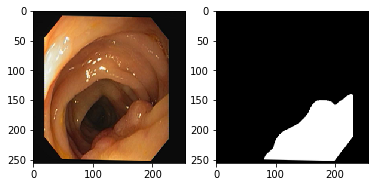

In [38]:
plt.subplot(121)
plt.imshow(augmented_img)
plt.subplot(122)
plt.imshow(augmented_mask)

In [23]:
np.unique(augmented_mask)  # these are not binarized values.

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  45,  46,  47,  50,  51,  53,  54,  55,  57,
        58,  59,  60,  61,  62,  64,  65,  66,  68,  69,  70,  71,  72,
        73,  74,  77,  78,  79,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  99, 100, 101, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       118, 119, 120, 121, 122, 124, 126, 128, 129, 130, 131, 132, 134,
       136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 149, 150,
       151, 152, 153, 154, 155, 156, 158, 159, 160, 162, 163, 164, 165,
       166, 167, 168, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 184, 185, 187, 188, 189, 191, 192, 193, 194, 195, 196,
       197, 199, 200, 201, 202, 203, 204, 205, 206, 208, 209, 21

In [24]:
bin_aug_mask = (augmented_mask//255)*255  # do binariation

In [25]:
# must do binarization
np.unique(bin_aug_mask)

array([  0, 255], dtype=uint8)

In [26]:
print(bin_aug_mask[::,::,0].shape)
bin_aug_mask = bin_aug_mask[::,::,0]

(256, 256)


In [27]:
np.unique(bin_aug_mask)

array([  0, 255], dtype=uint8)

In [28]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
closing = cv2.morphologyEx(bin_aug_mask, cv2.MORPH_CLOSE, kernel)

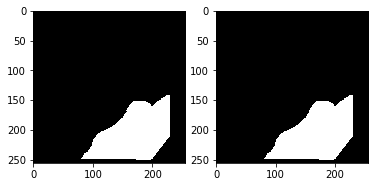

In [29]:
plt.subplot(121)
plt.imshow(bin_aug_mask, cmap="gray")
plt.subplot(122)
plt.imshow(closing, cmap="gray")

Do birghtness and contrast augmentation to image not to mask.  
Because it is not needed to mask. it comprises 0 or 1

In [34]:
q = Augmentor.DataPipeline([augmented_img])
q.random_contrast(probability=0.5, min_factor=0.5, max_factor=1.0) # low to High
q.random_brightness(probability=0.5, min_factor=0.5, max_factor=1.0) # dark to bright

In [35]:
q_img = q.sample(1)

In [36]:
print(np.array(q_img).shape)
sample = np.array(q_img).squeeze()
print(sample.shape)

(1, 256, 256, 3)
(256, 256, 3)


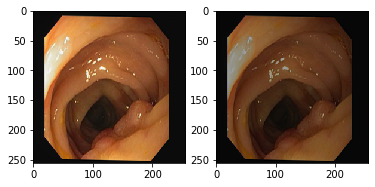

In [37]:
plt.subplot(121)
plt.imshow(augmented_img)
plt.subplot(122)
plt.imshow(sample)